In [ ]:
#test on 
#https://github.com/DriftingPig/Drones/blob/globalist/obiwan_analysis/ang_corr/ipynb/200per_0125_validation_chunk21.ipynb

Populating the interactive namespace from numpy and matplotlib


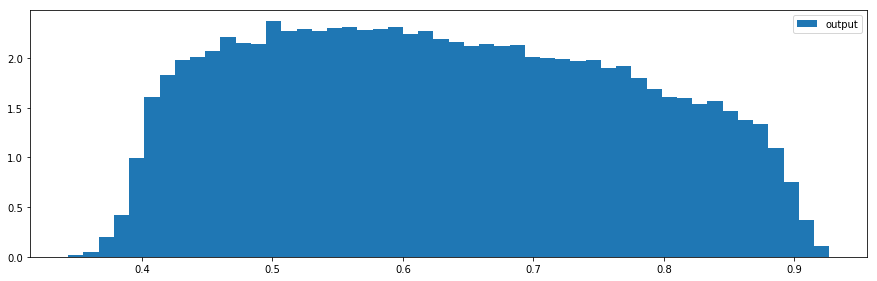

In [20]:
%pylab inline
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import numpy as np

topdir = '/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/subset/'
fn = 'eBOSS_ELG_full_ALL_v4.dat_cutted_really_masked_chunk21.fits'
fn_obiwan = 'elg_ngc_run_chunk23_really_masked.fits'
#DAT = fits.getdata(topdir+fn)
obiwan = fits.getdata(topdir+fn_obiwan)


def mag(mag,Type,data=obiwan): #Type='sim'/'obiwan'
    if Type is 'obiwan':
        mag_input = data
        g     = 22.5 - 2.5 * np.log10(data['flux_g'] / data['mw_transmission_g'])
        r_mag = 22.5 - 2.5 * np.log10(data['flux_r'] / data['mw_transmission_r'])
        z_mag = 22.5 - 2.5 * np.log10(data['flux_z'] / data['mw_transmission_z'])
        if mag == 'g':
            return g
        if mag == 'r':
            return r_mag
        if mag == 'z':
            return z_mag
    if Type is 'sim':
        g     = 22.5 - 2.5 * np.log10(data['sim_gflux'] / data['sim_mw_transmission_g'])
        r_mag = 22.5 - 2.5 * np.log10(data['sim_rflux'] / data['sim_mw_transmission_r'])
        z_mag = 22.5 - 2.5 * np.log10(data['sim_zflux'] / data['sim_mw_transmission_z'])
        if mag == 'g':
            return g
        if mag == 'r':
            return r_mag
        if mag == 'z':
            return z_mag
        
#g-r hist input,output (to ELG cut)
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.hist(mag('g','obiwan')-mag('r','obiwan'),label = 'output', bins = 50,stacked = False, normed = True)
plt.legend()

Text(0.5,1,'z')

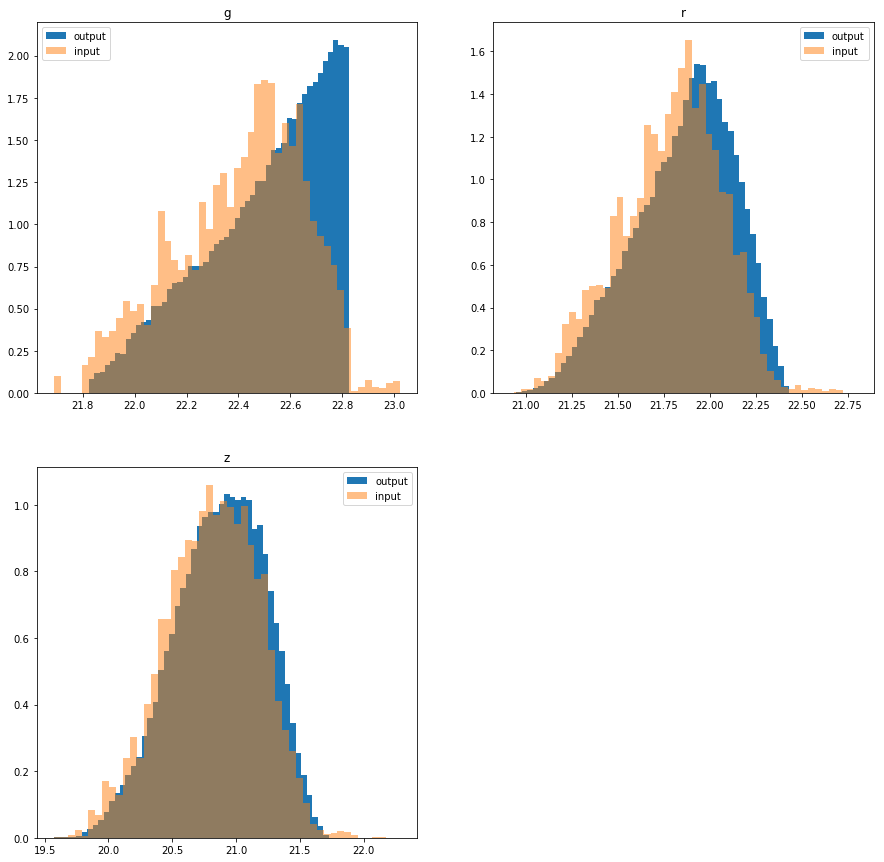

In [16]:

#g,r,z hist input,output (to ELG cut)
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.hist(mag(obiwan,'g'),label = 'output', bins = 50,stacked = False, normed = True)
plt.hist(obiwan['g'], label = 'input',bins = 50,stacked = False, normed = True, alpha=0.5)
plt.legend()
plt.title('g')

plt.subplot(2,2,2)
plt.hist(mag(obiwan,'r'),label = 'output', bins = 50,stacked = False, normed = True)
plt.hist(obiwan['r'], label = 'input',bins = 50,stacked = False, normed = True, alpha=0.5)
plt.legend()
plt.title('r')

plt.subplot(2,2,3)
plt.hist(mag(obiwan,'z'),label = 'output', bins = 50,stacked = False, normed = True)
plt.hist(obiwan['z'], label = 'input',bins = 50,stacked = False, normed = True, alpha=0.5)
plt.legend()
plt.title('z')

Text(0.5,1,'g mag diff hist')

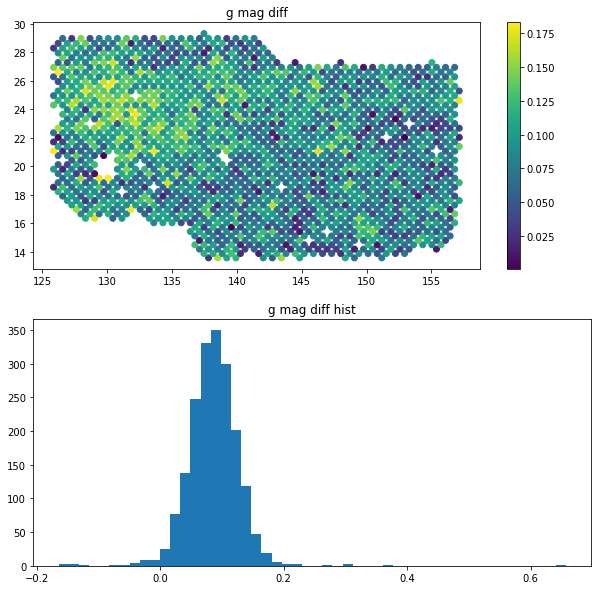

In [21]:
pixs = hp.ang2pix(128,obiwan['ra'],obiwan['dec'],nest = True, lonlat = True)
N = 12*128**2
hist_n = np.zeros(N)
hist_mag_diff_g = np.zeros(N)
hist_mag_diff_r = np.zeros(N)
hist_mag_diff_z = np.zeros(N)
mag_g = mag('g','obiwan')
mag_r =  mag('r','obiwan')
mag_z = mag('z','obiwan')

mag_g_sim = mag('g','sim')
mag_r_sim =  mag('r','sim')
mag_z_sim = mag('z','sim')

for i in range(len(pixs)):
    n = pixs[i]
    mag_diff_g = mag_g[i] - mag_g_sim[i]
    mag_diff_r = mag_r[i] - mag_r_sim[i]
    mag_diff_z = mag_z[i] - mag_z_sim[i]
    hist_mag_diff_g[n]+=mag_diff_g
    hist_mag_diff_r[n]+=mag_diff_r
    hist_mag_diff_z[n]+=mag_diff_z
    hist_n[n]+=1

ra,dec = hp.pix2ang(128,np.arange(N), nest = True,lonlat = True)
col1 = fits.Column(name = 'ra', array = ra, format = 'D')
col2 = fits.Column(name = 'dec', array = dec, format = 'D')
col3 = fits.Column(name = 'num', array = hist_n, format = 'D')
col4 = fits.Column(name = 'hist_mag_diff_g', array = hist_mag_diff_g, format = 'D')
col5 = fits.Column(name = 'hist_mag_diff_r', array = hist_mag_diff_r, format = 'D')
col6 = fits.Column(name = 'hist_mag_diff_z', array = hist_mag_diff_z, format = 'D')

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
dat = fits.BinTableHDU.from_columns([col1,col2,col3,col4,col5,col6]).data
sel = dat['num']
sel_num = (sel>0)
final = dat[sel_num]
hist_mag_diff_g_sel = final['hist_mag_diff_g']/final['num']
sel = (hist_mag_diff_g_sel>0.0)&(hist_mag_diff_g_sel<0.19)
super_final = final[sel]
sc = plt.scatter(super_final['ra'],super_final['dec'],c=super_final['hist_mag_diff_g']/super_final['num'])
plt.colorbar(sc)
plt.title('g mag diff')
plt.subplot(2,1,2)
pt = plt.hist(final['hist_mag_diff_g']/final['num'],bins = 50)
plt.title('g mag diff hist')

In [23]:
(final['hist_mag_diff_g']/final['num']).mean(),(final['hist_mag_diff_g']/final['num']).std()

(0.086527945119187488, 0.04195252505421742)

In [24]:
current_ccd_fn='/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_data/legacysurveydir_dr3/c-c-d-s/survey-ccds-ebossDR3_dr3.fits.gz'
dat = fits.getdata(current_ccd_fn)

In [25]:
len(dat)

213633

In [26]:
topdir_ccds='/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_data/ebosselg_ccds/'
dr3_1= fits.getdata(topdir_ccds+'survey-ccds-dr3.fits.gz')
len(dr3_1)

206231

In [30]:
utah_sgc = topdir_ccds+'survey-ccds-dr3_utah_sgc.fits'
utah_sgc = fits.getdata(utah_sgc)
len(utah_sgc)

utah_ngc = topdir_ccds+'survey-ccds-dr3_utah_ngc.fits.gz'
utah_ngc = fits.getdata(utah_ngc)
len(utah_ngc)

5187

In [40]:
expnum=np.hstack((dr3_1['expnum'],utah_sgc['expnum'],utah_ngc['expnum']))
ccdname=np.hstack((dr3_1['ccdname'],utah_sgc['ccdname'],utah_ngc['ccdname']))

In [43]:

uniqid      = np.array([str(e)+'-'+n for e,n in zip(expnum,ccdname)])
keep        = np.unique(uniqid,return_index=True)[1]


In [45]:
len(keep)

213633

In [37]:
len(utah_ngc)

5187

In [3]:
import numpy as np
topdir0='/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/obiwan_corr/3d/corr_output/2PCF2/'
dat1=np.loadtxt(topdir0+'2PCF/2PCF_EZmock_eBOSS_ELG_eboss23GC_v4_z0.6z1.1_0444.dat')

Populating the interactive namespace from numpy and matplotlib


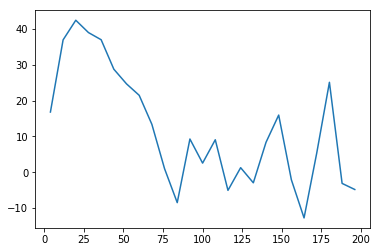

In [7]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import astropy.io.fits as fits
from astropy.table import Table
plt.plot(dat1[:,0],dat1[:,1]*dat1[:,0]*dat1[:,0])

In [8]:
topdir0='/global/cscratch1/sd/huikong/obiwan_Aug/repos_for_docker/obiwan_out/obiwan_corr/3d/corr_output/2PCF/'
dat1=np.loadtxt(topdir0+'2PCF_EZmock_eBOSS_ELG_eboss23GC_v4_z0.6z1.1_0444.dat')


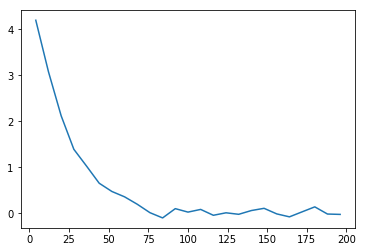

In [11]:
plt.plot(dat1[:,0],dat1[:,1]*dat1[:,0])

In [12]:
def get(f,td = topdir0):
    return np.loadtxt(topdir0+f)
dd = get('2PCF_EZmock_eBOSS_ELG_eboss23GC_v4_z0.6z1.1_0665.dd')
dr = get('2PCF_EZmock_eBOSS_ELG_eboss23GC_v4_z0.6z1.1_0665.dr')
rr = get('2PCF_EZmock_eBOSS_ELG_eboss23GC_v4_z0.6z1.1.rr')
ff = (dd[:,2]-2*dr[:,2]+rr[:,2])/rr[:,2]

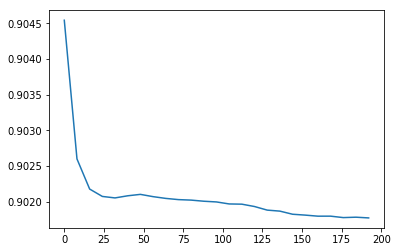

In [17]:
plt.plot(dd[:,0],ff)

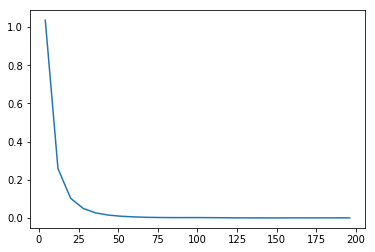

In [22]:
#x0 
def get(num,td = topdir0):
    f=np.loadtxt(topdir0+"2PCF_EZmock_eBOSS_ELG_eboss23GC_v4_z0.6z1.1_%04d.dat"%num).transpose()
    return f
x = get(1)[0]
y = np.zeros_like(x)
y_list=[]
for i in range(1,1001):
    y_i = get(i)[1]
    y+=y_i
    y_list.append(y_i)
y = y/1000
plt.plot(x,y)

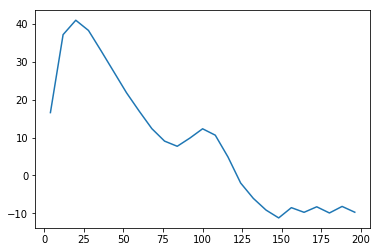

In [21]:
plt.plot(x,y*x*x)

In [24]:
y_list = np.array(y_list)
std_list = []
for i in range(len(y_list[0])):
    std_list.append(y_list[:,i].std())

<Container object of 3 artists>

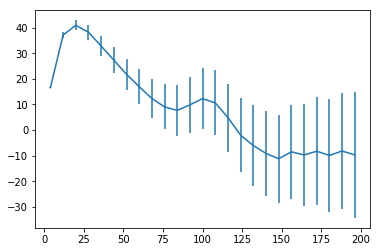

In [25]:
std_list=np.array(std_list)
plt.errorbar(x,y*x*x,std_list*x*x)

In [26]:
std_list

array([ 0.01829278,  0.00720572,  0.0049647 ,  0.00368443,  0.00300034,
        0.00256303,  0.00221554,  0.00191411,  0.00166545,  0.00152548,
        0.00141858,  0.00129346,  0.00117787,  0.0010887 ,  0.00098874,
        0.00093939,  0.00090595,  0.00085157,  0.00078571,  0.00075334,
        0.00074198,  0.00071028,  0.00068192,  0.00064434,  0.0006407 ])